## Download Dataset From Kaggle

In [ ]:
!pip install -q kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

## download dataset 
!kaggle datasets download -d uciml/pima-indians-diabetes-database

## unzip dataset
!unzip "pima-indians-diabetes-database.zip" -d "diabetes_dataset"

     |████████████████████████████████| 61kB 4.0MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=c42f26ac8ea5d5bd2e8edbaf0c68285cca6eb3cf4f9dfc5e6ea6207a6643e34d
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


Saving kaggle.json to kaggle.json
kaggle.json
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 6.40MB/s]
Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes_dataset/diabetes.csv  


## Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
%matplotlib inline

## EDA 

In [ ]:
dataset = pd.read_csv('/content/diabetes_dataset/diabetes.csv')
print(f"shape of the Diabetes dataset :- {dataset.shape}")
print("\n ***************************** \n")
print(f"Sample Dataset :- \n {dataset.head()}")
## null values checking 
print("\n ***************************** \n")
print(f"checking for null values :- \n {dataset.isnull().sum()}")
print("\n ***************************** \n")
## checking for whether dataset have duplicate values or not
print(f"Number of Duplicate values :- {len(dataset.loc[dataset.duplicated()])}")


shape of the Diabetes dataset :- (768, 9)

 ***************************** 

Sample Dataset :- 
    Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

 ***************************** 

checking for null values :- 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 *****************************

## Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


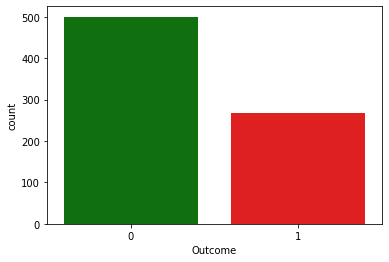

In [ ]:
## count plot for target veriable
sns.countplot(dataset['Outcome'], palette=['green', 'red'])

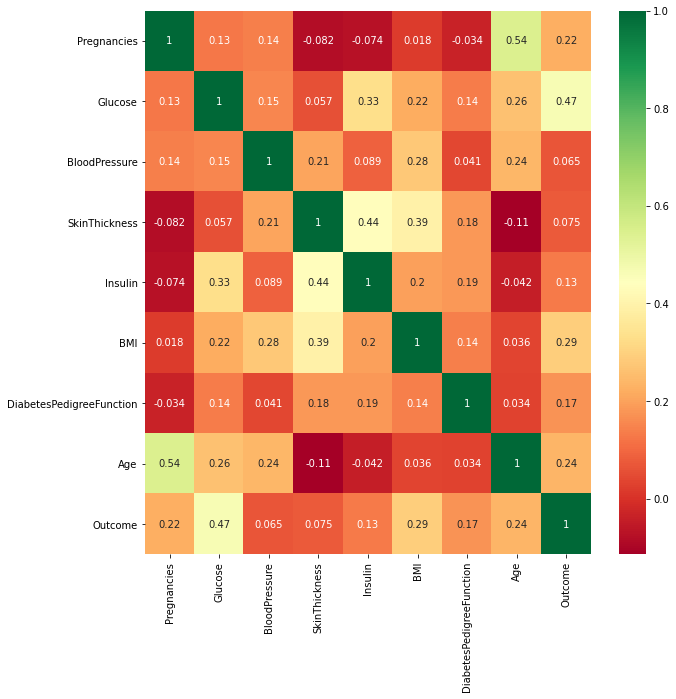

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True, annot_kws={'size':10}, cmap='RdYlGn')

## Data Preprocessing & Preparing Data for model

In [ ]:
## separate dataset of independent and dependent variables
X = dataset.drop(['Outcome'], axis=1)
y = dataset['Outcome']

col_names = list(X.columns)
## craete pipe line with feature scaling
pipeline = Pipeline([
                     ('std_scale', PowerTransformer(method='yeo-johnson'))
])

X = pd.DataFrame(pipeline.fit_transform(X), columns=col_names)

print(X.head())
## split dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.1, random_state=42)

print(f"Size Of The Train Dataset :- {len(X_train)}")
print(f"Size Of The Test Dataset :- {len(X_test)}")

   Pregnancies   Glucose  ...  DiabetesPedigreeFunction       Age
0     0.813399  0.848665  ...                  0.821764  1.364180
1    -0.833906 -1.123027  ...                 -0.168409  0.126452
2     1.188996  1.930906  ...                  0.935284  0.230161
3    -0.833906 -0.996671  ...                 -1.298725 -1.480075
4    -1.603317  0.506848  ...                  2.336680  0.327328

[5 rows x 8 columns]
Size Of The Train Dataset :- 691
Size Of The Test Dataset :- 77


## Model Building

In [ ]:
train_scores = []
test_scores = []

for i in range(1, 25):
  knn_clf = KNeighborsClassifier(n_neighbors=i)
  knn_clf.fit(X_train, y_train)

  train_scores.append(knn_clf.score(X_train, y_train))
  test_scores.append(knn_clf.score(X_test, y_test))

print(f"Max score of Train dataset at K = {train_scores.index(max(train_scores)) + 1} and score :- {max(train_scores)*100}%")
print(f"Max score of Test dataset at K = {test_scores.index(max(test_scores)) + 1} and score :- {round(max(test_scores)*100, 2)}%")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


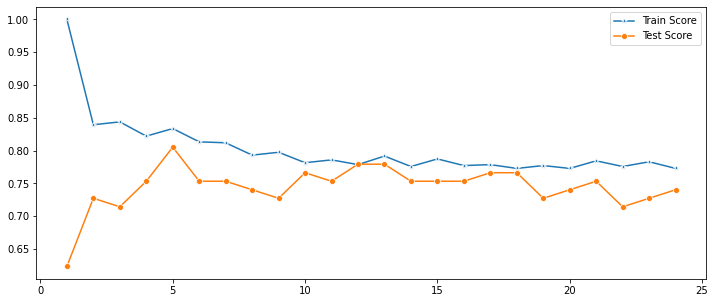

In [ ]:
## training history graph 
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,25),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,25),test_scores,marker='o',label='Test Score')

In [ ]:
## best score on test data at k = 5

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Evaluation

In [ ]:
## predict X_test 
y_pred = knn_clf.predict(X_test)
print("\n ***************************** \n")
print(f"Accuracy :- \n {accuracy_score(y_test, y_pred)*100}")
print("\n ***************************** \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}")
print("\n ***************************** \n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


 ***************************** 

Accuracy :- 
 80.51948051948052

 ***************************** 

Confusion Matrix :- 
[[43  7]
 [ 8 19]]

 ***************************** 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        50
           1       0.73      0.70      0.72        27

    accuracy                           0.81        77
   macro avg       0.79      0.78      0.78        77
weighted avg       0.80      0.81      0.80        77

